In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.fft import fft
from matplotlib.animation import FuncAnimation
from sklearn.preprocessing import MinMaxScaler

In [106]:
path = "./data"
dir_list = os.listdir(path) 

In [107]:
dir_list

['S2_T1.csv',
 'S2_T2.csv',
 'S2_T3.csv',
 'S1_T1.csv',
 'S1_T3.csv',
 'S1_T2.csv',
 'S1_T4.csv',
 'README.txt']

In [108]:
def statistical_analysis(df):
    stats = {
        'Mean': df['Force'].mean(),
        'Standard Deviation': df['Force'].std(),
        'Max': df['Force'].max(),
        'Min': df['Force'].min(),
        'Median': df['Force'].median(),
        'Skewness': df['Force'].skew(),
        'Kurtosis': df['Force'].kurtosis()
    }
    rolling_mean = df['Force'].rolling(window=10).mean()
    rolling_std = df['Force'].rolling(window=10).std()
    
    return stats, rolling_mean, rolling_std

In [109]:
def spectral_analysis(df):
    # Calculate sampling period
    sampling_period = df['Time'].diff().mean()
    
    # Perform FFT
    N = len(df)
    yf = fft(df['Force'].values)
    xf = np.fft.fftfreq(N, sampling_period)[:N//2]
    amplitude_spectrum = 2.0/N * np.abs(yf[:N//2])
    print("SPECTRAL ANALYSIS")
    # Plot the spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(xf, amplitude_spectrum)
    plt.grid(True)
    plt.title('Frequency Spectrum')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.show()
    
    return xf, amplitude_spectrum

In [110]:
def compute_time_derivative(df):
    # Calculate the time derivative (rate of change) of force
    df['Force_Derivative'] = df['Force'].diff() / df['Time'].diff()
    rolling_mean = df['Force_Derivative'].rolling(window=10).mean()
    return df

def plot_signals(df):
    # Create subplots for original signal and its derivative
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))
    
    # Plot original force signal
    ax1.plot(df['Time'], df['Force'])
    ax1.set_title('Original Force Signal')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Force')
    ax1.grid(True)
    
    # Plot derivative
    ax2.plot(df['Time'], df['Force_Derivative'])
    ax2.set_title('Force Derivative (dF/dt)')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Force Derivative')
    ax2.grid(True)

    # ax3.plot(df['Time'], df['Force_Derivative'])
    # ax3.set_title('Force Derivative (dF/dt)')
    # ax3.set_xlabel('Time')
    # ax3.set_ylabel('Force Derivative')
    # ax3.grid(True)
    
    plt.tight_layout()
    plt.show()

S2_T1.csv data
SPECTRAL ANALYSIS


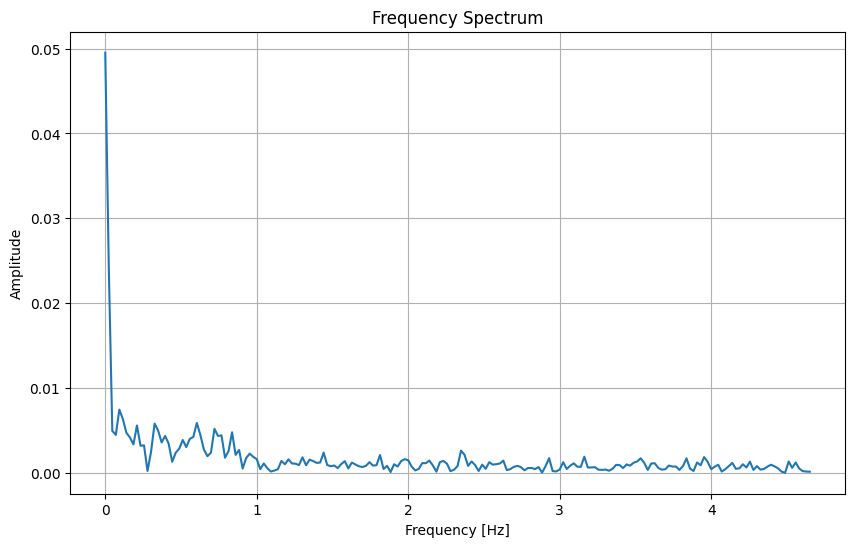

Statistical Analysis Results:
Mean: 0.02475682382133995
Standard Deviation: 0.02625948436736769
Max: 0.1523
Min: -0.0113
Median: 0.0153
Skewness: 1.5622565803036021
Kurtosis: 3.5285863742275025


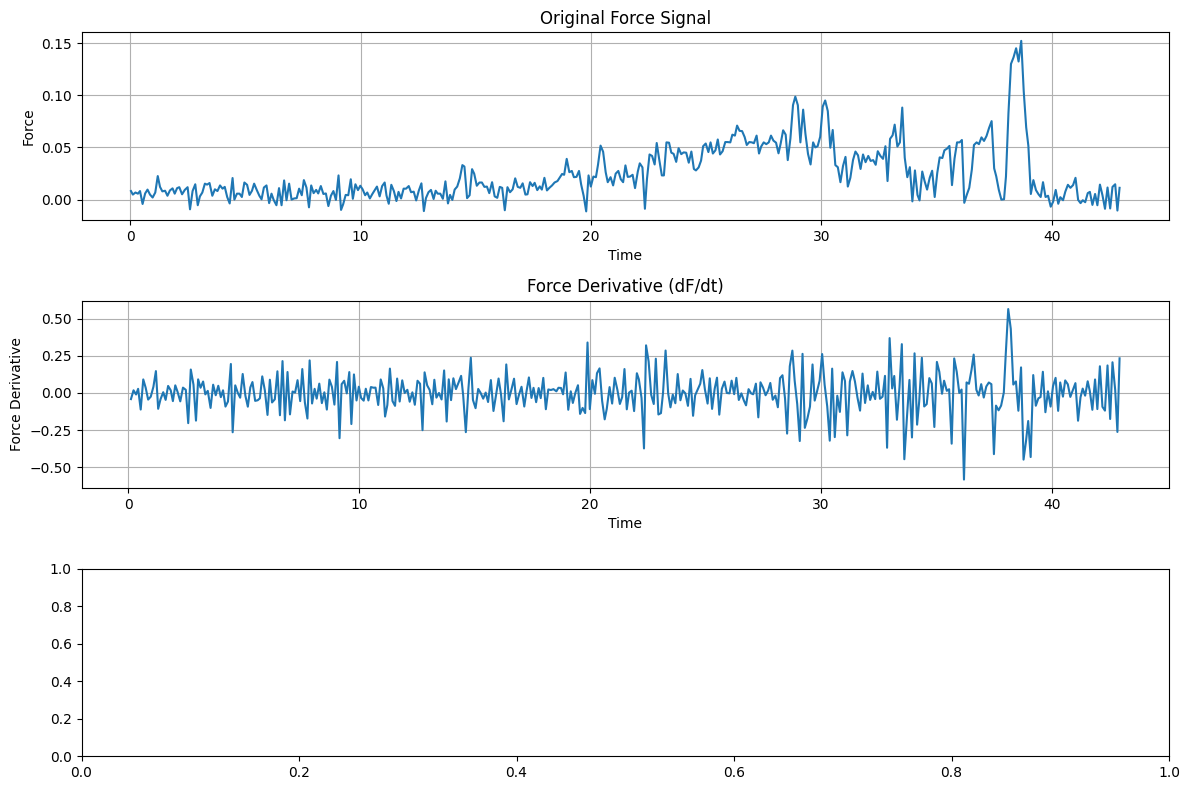

S2_T2.csv data
SPECTRAL ANALYSIS


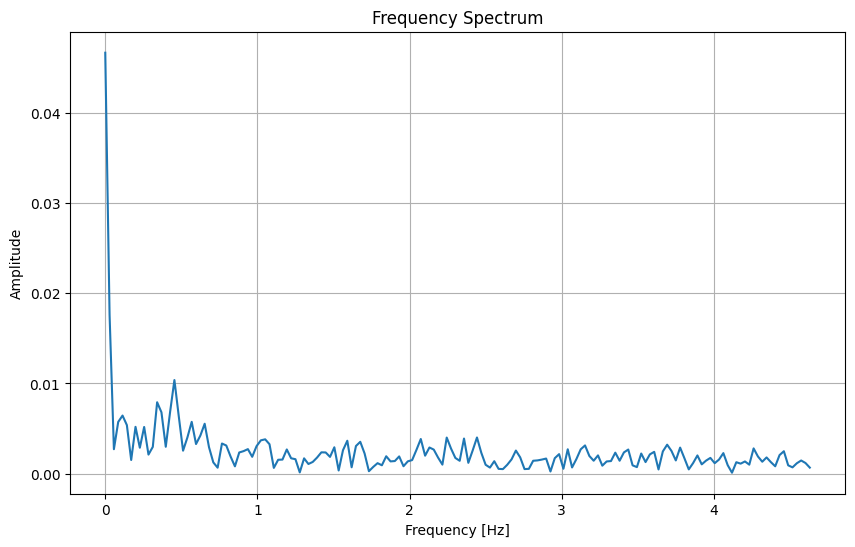

Statistical Analysis Results:
Mean: 0.023358966565349543
Standard Deviation: 0.027245178363349137
Max: 0.1667
Min: -0.0116
Median: 0.0142
Skewness: 1.6650429568847165
Kurtosis: 3.348911927327414


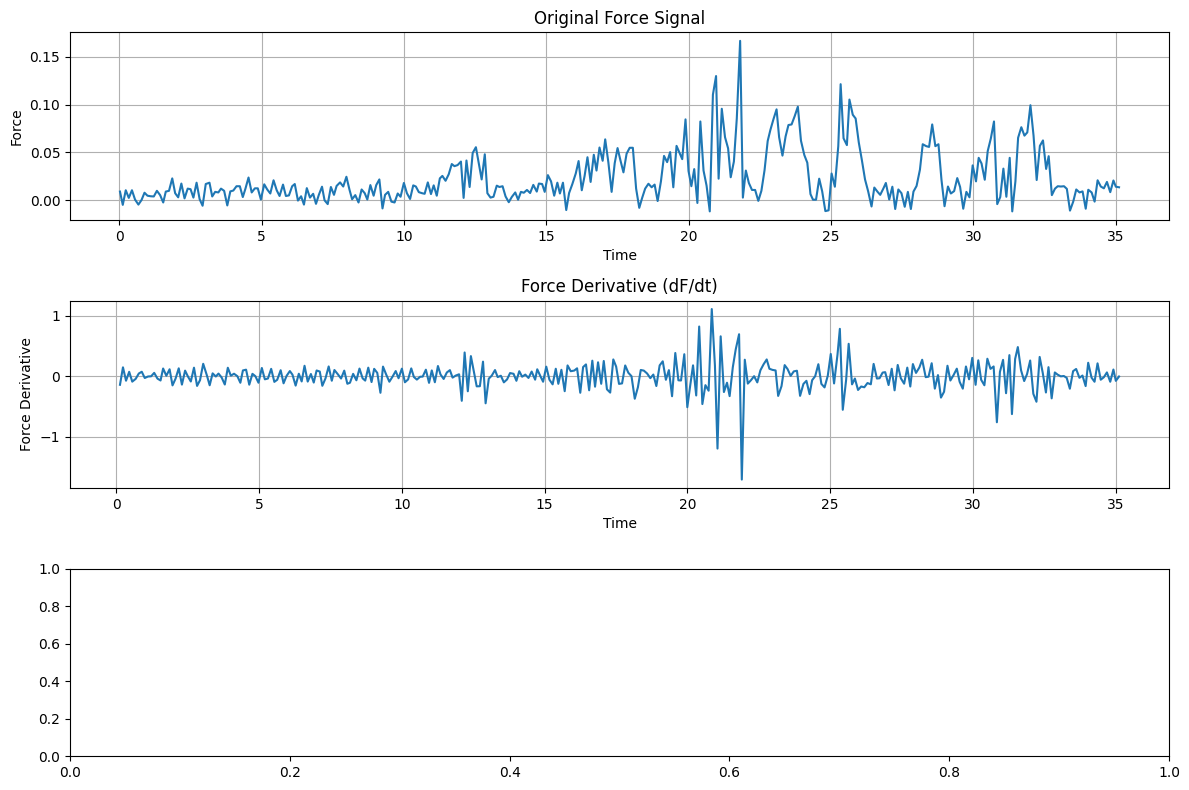

S2_T3.csv data
SPECTRAL ANALYSIS


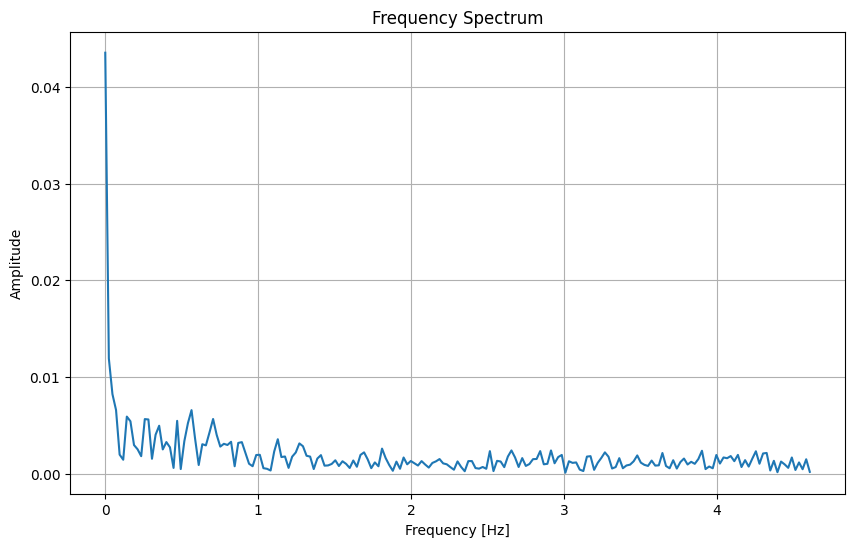

Statistical Analysis Results:
Mean: 0.021769367088607595
Standard Deviation: 0.022886894668520445
Max: 0.1161
Min: -0.0102
Median: 0.0136
Skewness: 1.363668439948874
Kurtosis: 1.87337640568487


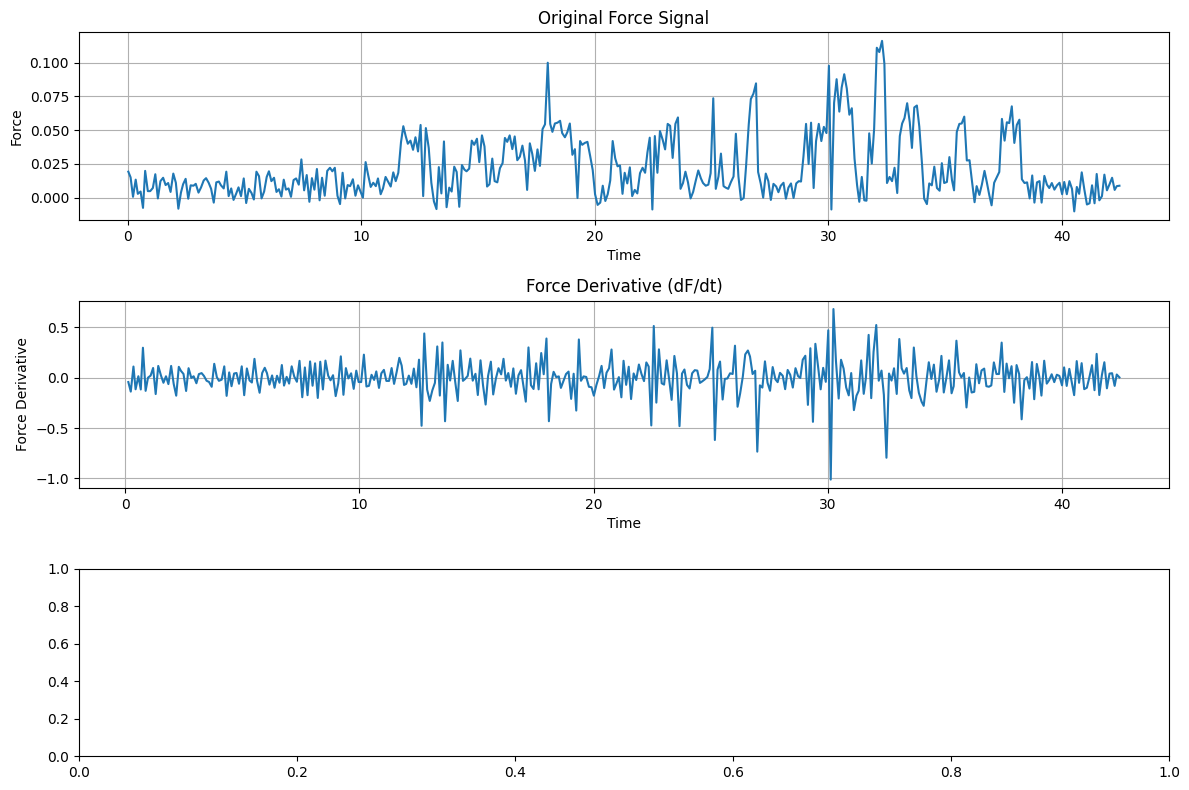

S1_T1.csv data
SPECTRAL ANALYSIS


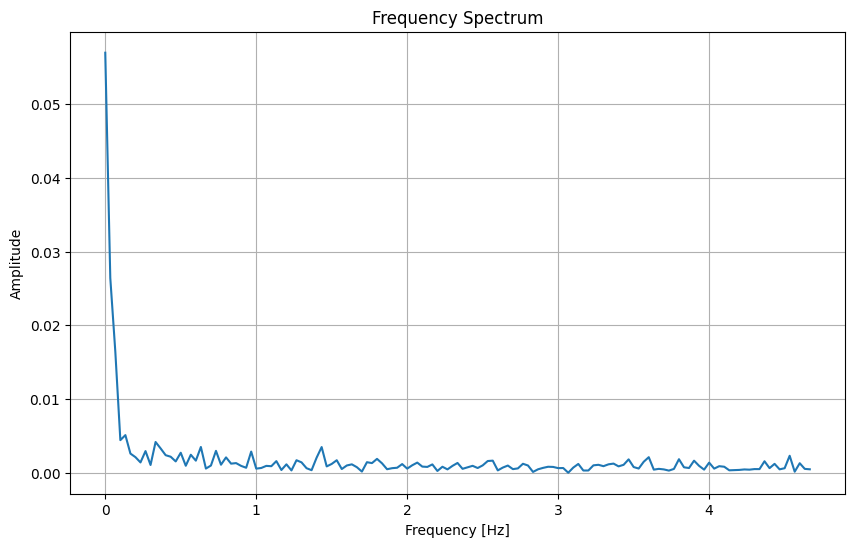

Statistical Analysis Results:
Mean: 0.028463475177304964
Standard Deviation: 0.02521553169009078
Max: 0.0897
Min: -0.011
Median: 0.0198
Skewness: 0.6446446260194727
Kurtosis: -0.7579750215517405


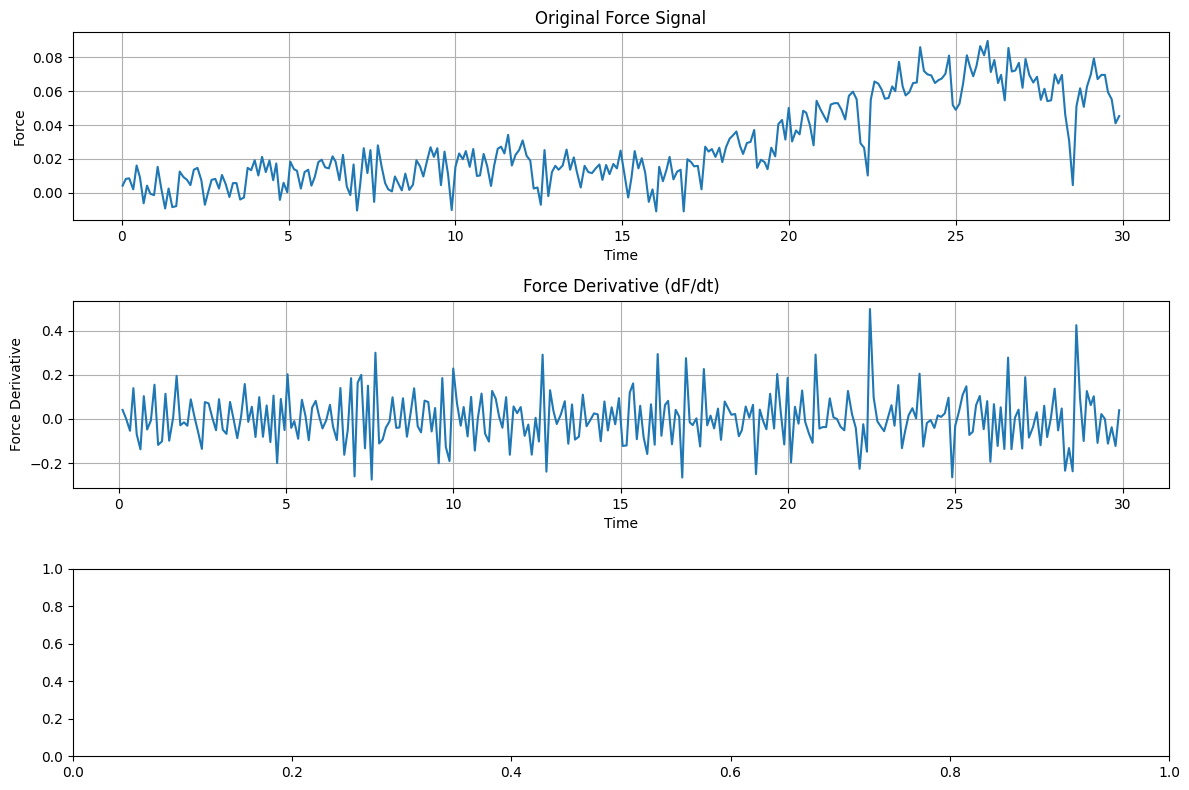

S1_T3.csv data
SPECTRAL ANALYSIS


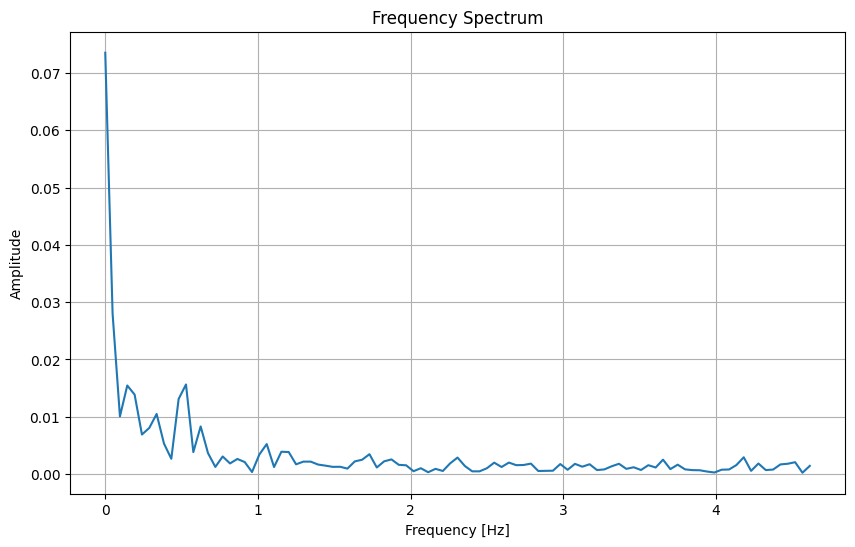

Statistical Analysis Results:
Mean: 0.03676958762886597
Standard Deviation: 0.034315022659761565
Max: 0.1192
Min: -0.0144
Median: 0.02915
Skewness: 0.5845791746910659
Kurtosis: -0.6699275646932623


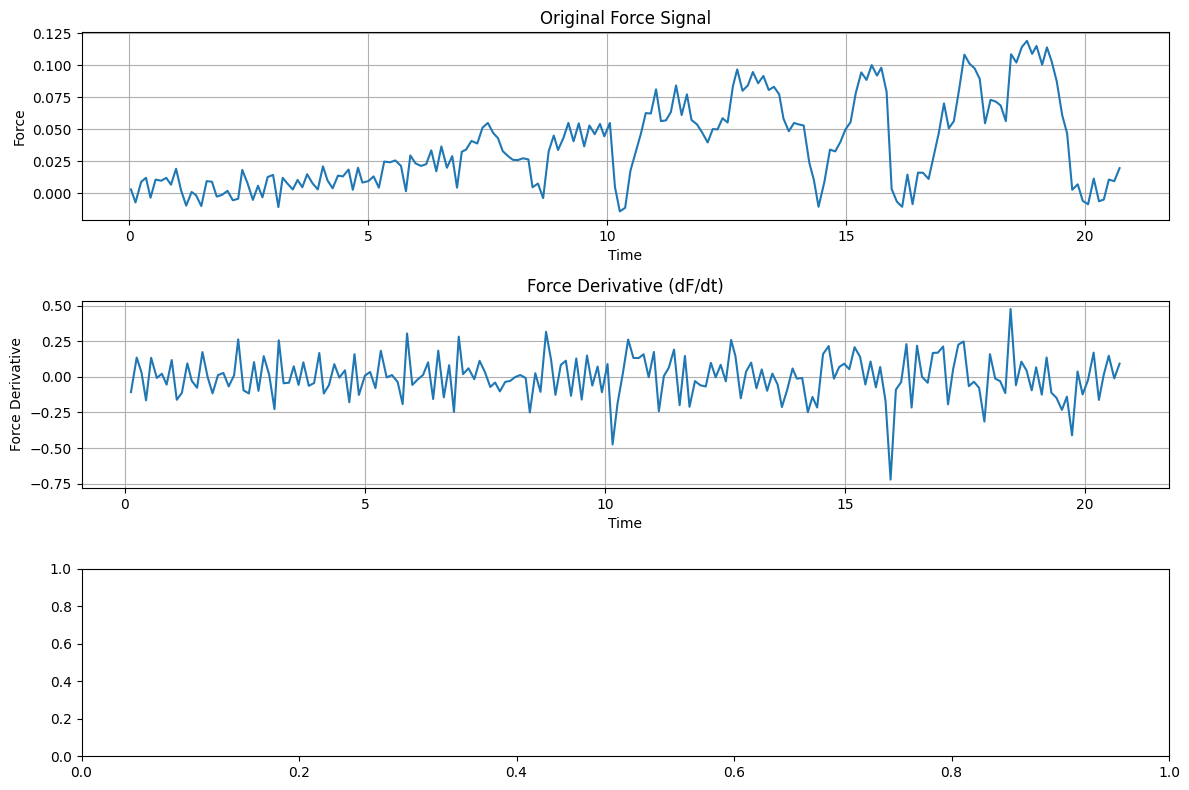

S1_T2.csv data
SPECTRAL ANALYSIS


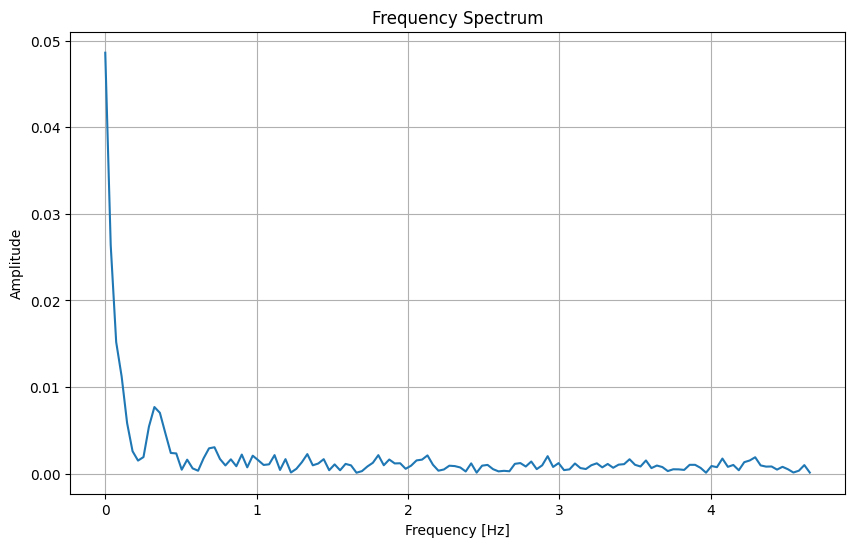

Statistical Analysis Results:
Mean: 0.024313409961685822
Standard Deviation: 0.02668948532987462
Max: 0.12
Min: -0.0091
Median: 0.0136
Skewness: 1.4722012878015027
Kurtosis: 1.6504337014153032


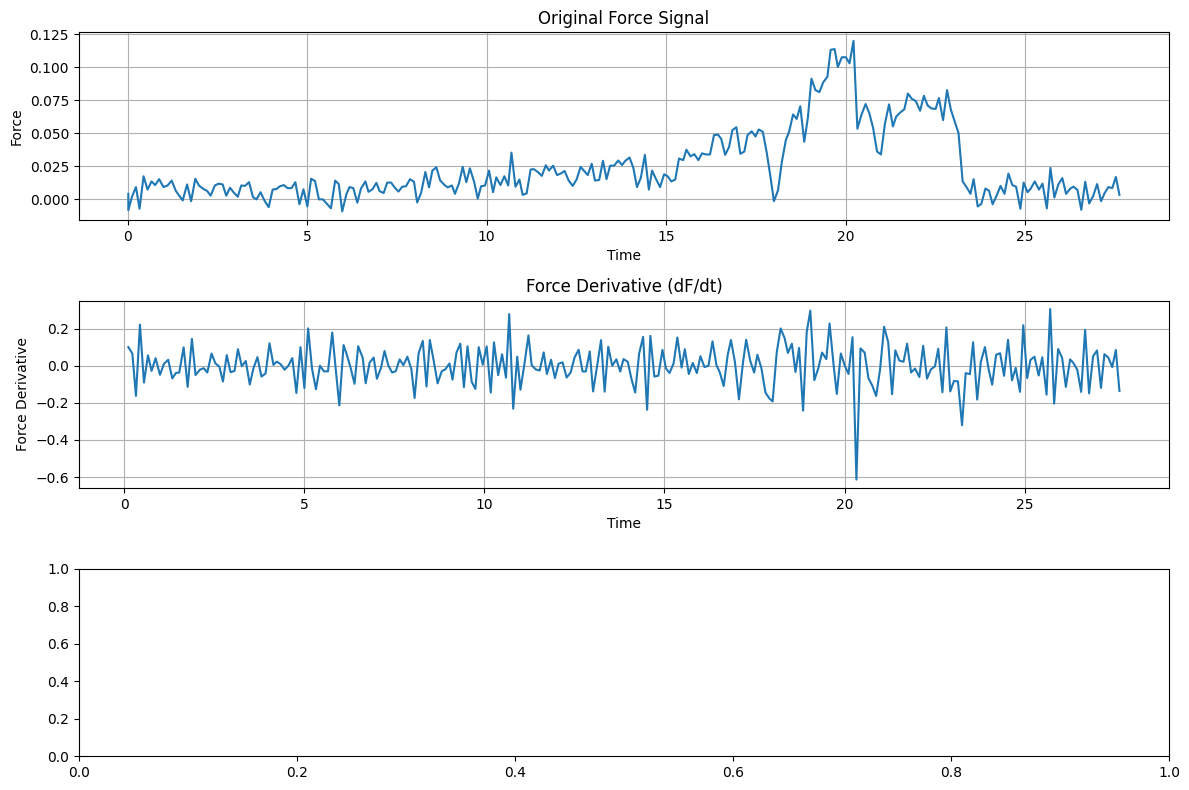

S1_T4.csv data
SPECTRAL ANALYSIS


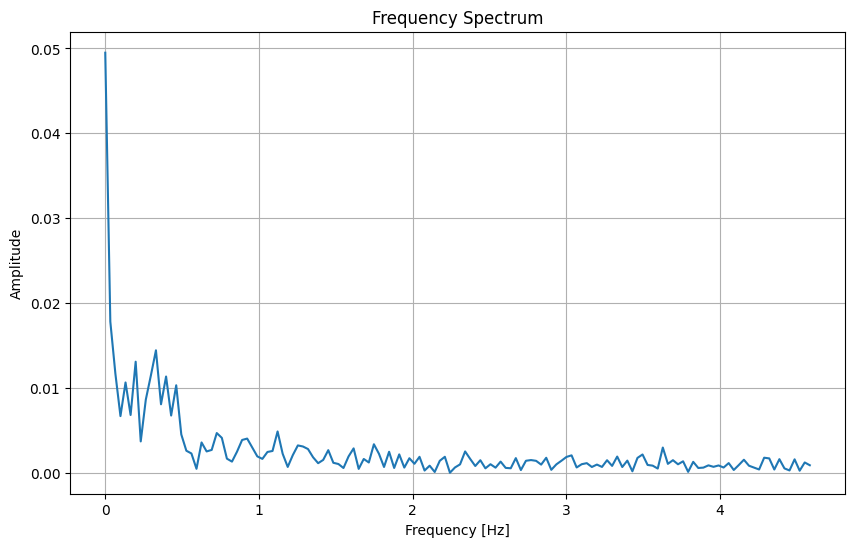

Statistical Analysis Results:
Mean: 0.02474555160142349
Standard Deviation: 0.03196874349264013
Max: 0.135
Min: -0.0116
Median: 0.013
Skewness: 1.6099658924129239
Kurtosis: 2.096138058268228


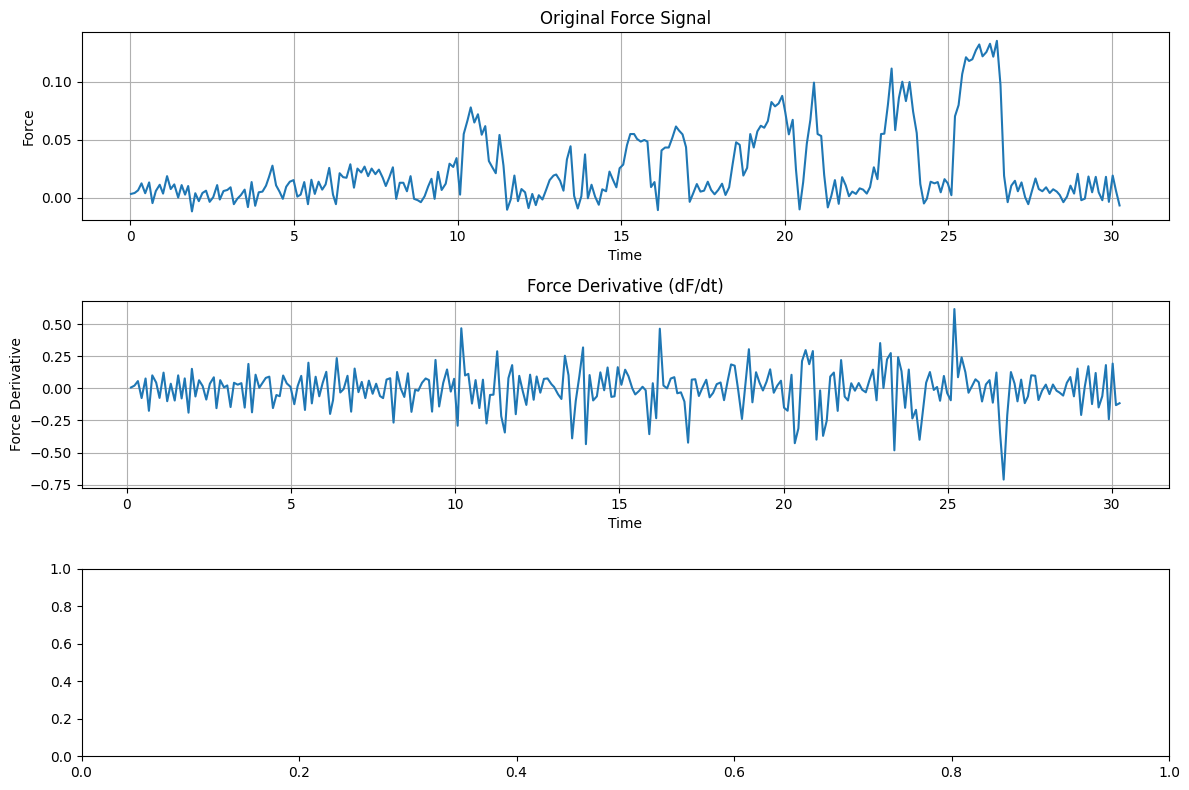

In [111]:
for dir in dir_list:
    if dir == 'README.txt':
        continue
    df = pd.read_csv(f'{path}/{dir}')
    print(f"{dir} data")
    stats, rolling_mean, rolling_std = statistical_analysis(df)
    frequencies, amplitudes = spectral_analysis(df)
    df_with_derivative = compute_time_derivative(df)
    
    # Print results
    print("Statistical Analysis Results:")
    for key, value in stats.items():
        print(f"{key}: {value}")
    df = compute_time_derivative(df)
    plot_signals(df)
        

In [112]:
df = pd.read_csv("./Data/S2_T1.csv")

In [113]:
df.head()

,Time,Force
0,0.035481,0.0082
1,0.118066,0.0048
2,0.229815,0.0068
3,0.339043,0.0057
4,0.428543,0.0082


In [114]:
rolling_mean = df['Force'].rolling(window=20).mean()

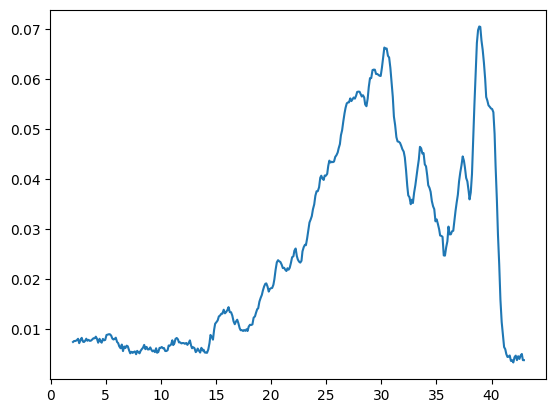

In [115]:
plt.plot(df['Time'], rolling_mean)

In [116]:
from scipy.signal import savgol_filter

def savitzky_golay(signal, window_size, poly_order):
    return savgol_filter(signal, window_size, poly_order)

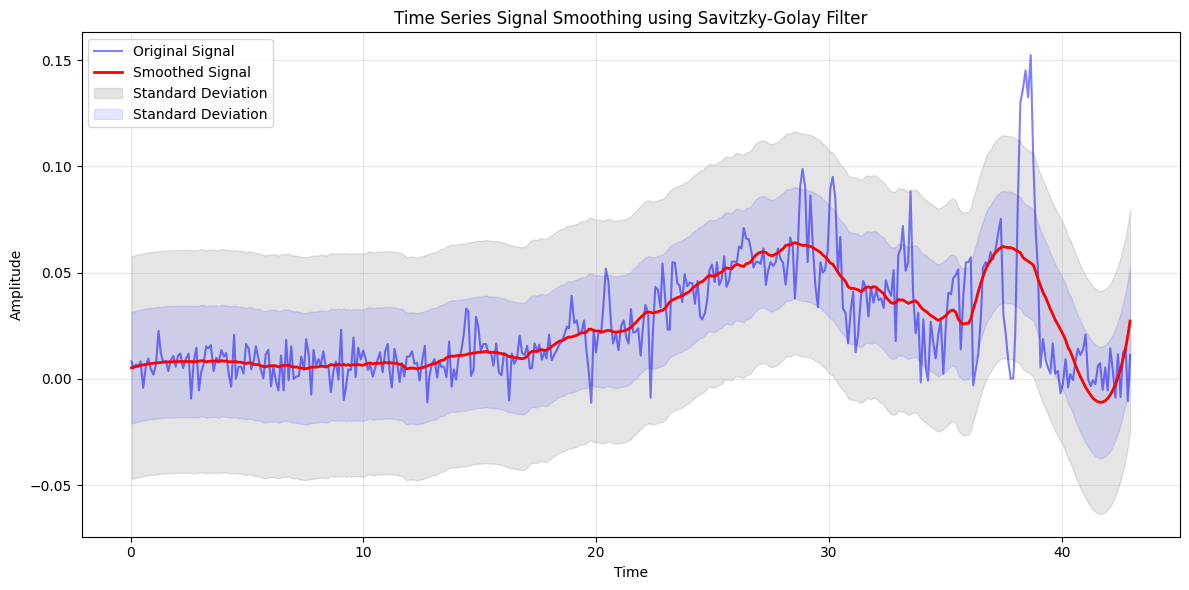

In [117]:
# Smooth the signal using Savitzky-Golay filter
window_size = 50
degree = 3
smoothed_signal = savgol_filter(df['Force'], window_size, degree)
std_dev = np.std(df['Force'])
# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Force'], 'b-', alpha=0.5, label='Original Signal')
plt.plot(df['Time'], smoothed_signal, 'r-', linewidth=2, label='Smoothed Signal')

plt.fill_between(df['Time'], 
                smoothed_signal - 2*std_dev, 
                smoothed_signal + 2*std_dev, 
                color='gray', 
                alpha=0.2, 
                label='Standard Deviation')

plt.fill_between(df['Time'], 
                smoothed_signal - std_dev, 
                smoothed_signal + std_dev, 
                color='blue', 
                alpha=0.1, 
                label='Standard Deviation')

# Customize the plot
plt.title('Time Series Signal Smoothing using Savitzky-Golay Filter')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [118]:
import pandas as pd
df = pd.read_csv ('./Data/S1_T1.csv')
df.to_json ('something.json')

MovieWriter imagemagick unavailable; using Pillow instead.


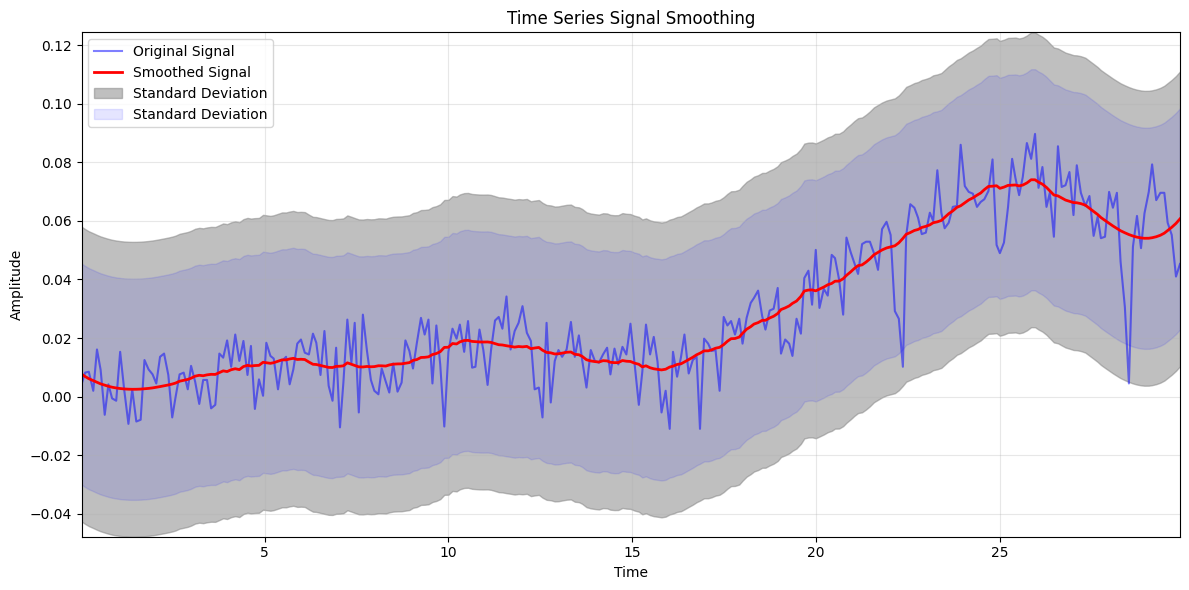

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from matplotlib.animation import FuncAnimation

# Assuming df['Time'] and df['Force'] are your data
# Smooth the signal using Savitzky-Golay filter
window_size = 50
degree = 3
smoothed_signal = savgol_filter(df['Force'], window_size, degree)
std_dev = np.std(df['Force'])

# Prepare the figure for animation
fig, ax = plt.subplots(figsize=(12, 6))
line_original, = ax.plot(df['Time'], df['Force'], 'b-', alpha=0.5, label='Original Signal')
line_smoothed, = ax.plot([], [], 'r-', linewidth=2, label='Smoothed Signal')

# Fill between for standard deviation
fill_between = ax.fill_between(df['Time'], 
                            smoothed_signal - 2*std_dev, 
                            smoothed_signal + 2*std_dev, 
                            color='gray', 
                            alpha=0.5, 
                            label='Standard Deviation')

plt.fill_between(df['Time'], 
                smoothed_signal - 1.5*std_dev, 
                smoothed_signal + 1.5*std_dev, 
                color='blue', 
                alpha=0.1, 
                label='Standard Deviation')

# Customize the plot
ax.set_title('Time Series Signal Smoothing')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.grid(True, alpha=0.3)
ax.legend()

# Set the x and y axis limits
ax.set_xlim(df['Time'].min(), df['Time'].max())
ax.set_ylim(min(df['Force'].min(), (smoothed_signal - 2*std_dev).min()),
            max(df['Force'].max(), (smoothed_signal + 2*std_dev).max()))

# Animation function
def animate(i):
    end = i + 1
    line_smoothed.set_data(df['Time'][:end], smoothed_signal[:end])
    return line_smoothed,
interval = 50
# Create animation
ani = FuncAnimation(fig, animate, frames=len(df['Time']), interval=interval, blit=True)
ani.save(f'animations1t1final.gif', writer='imagemagick')

plt.tight_layout()
plt.show()

S2_T1.csv data


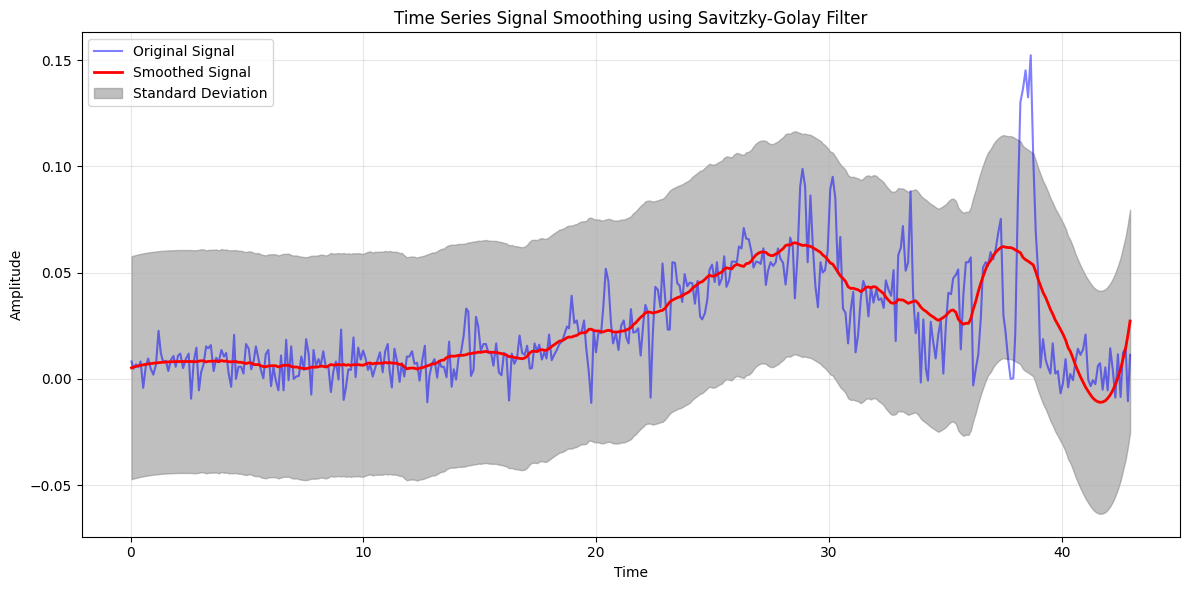

S2_T2.csv data


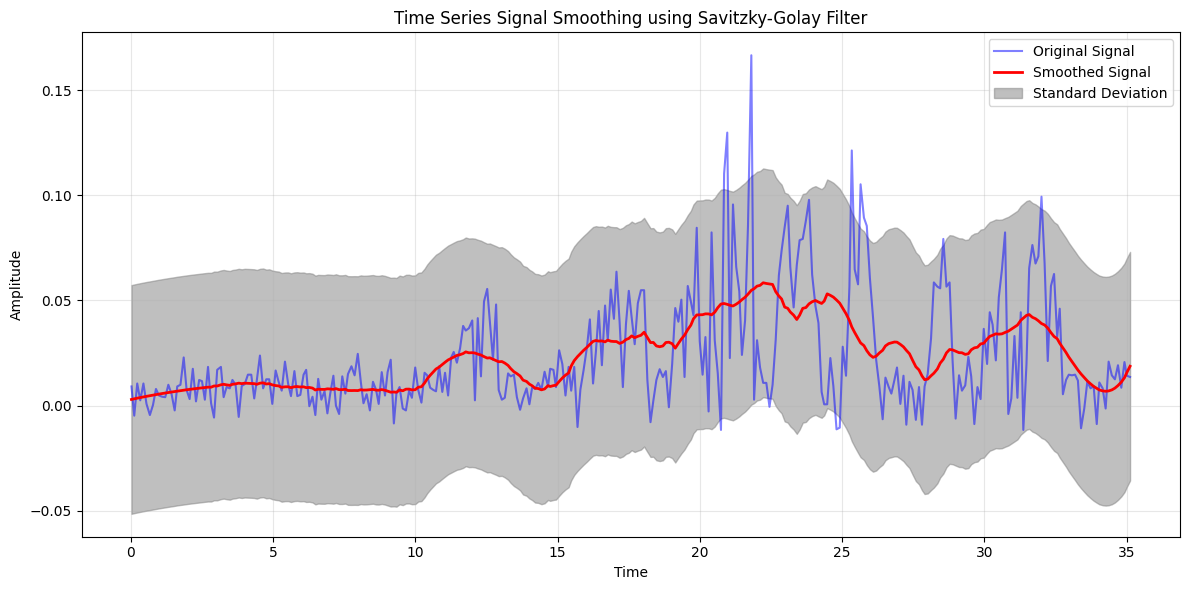

S2_T3.csv data


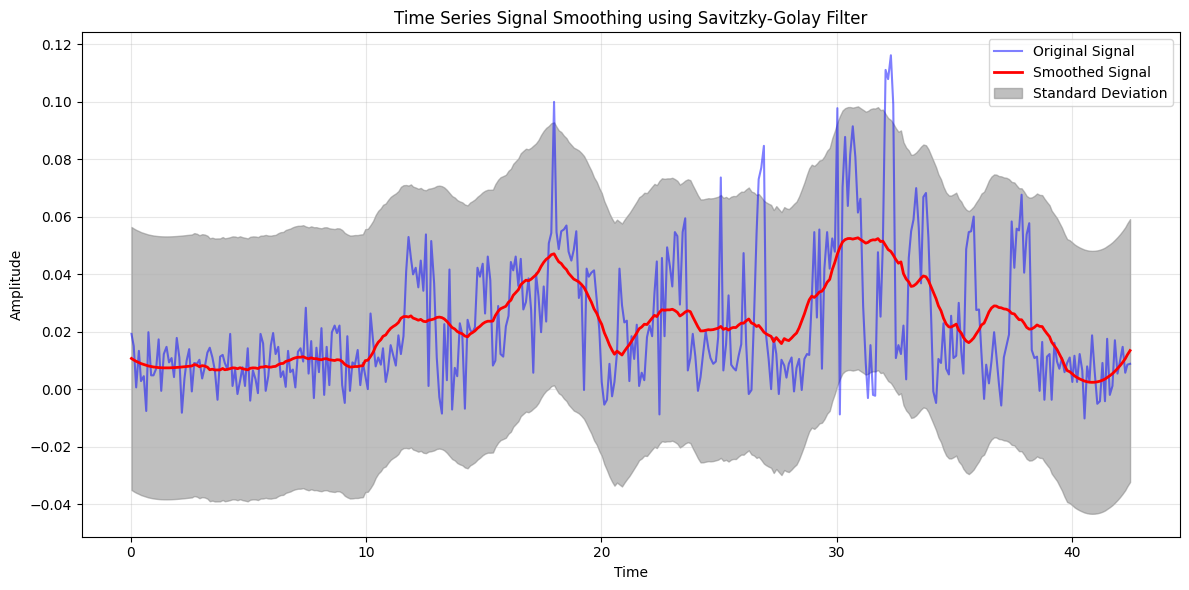

S1_T1.csv data


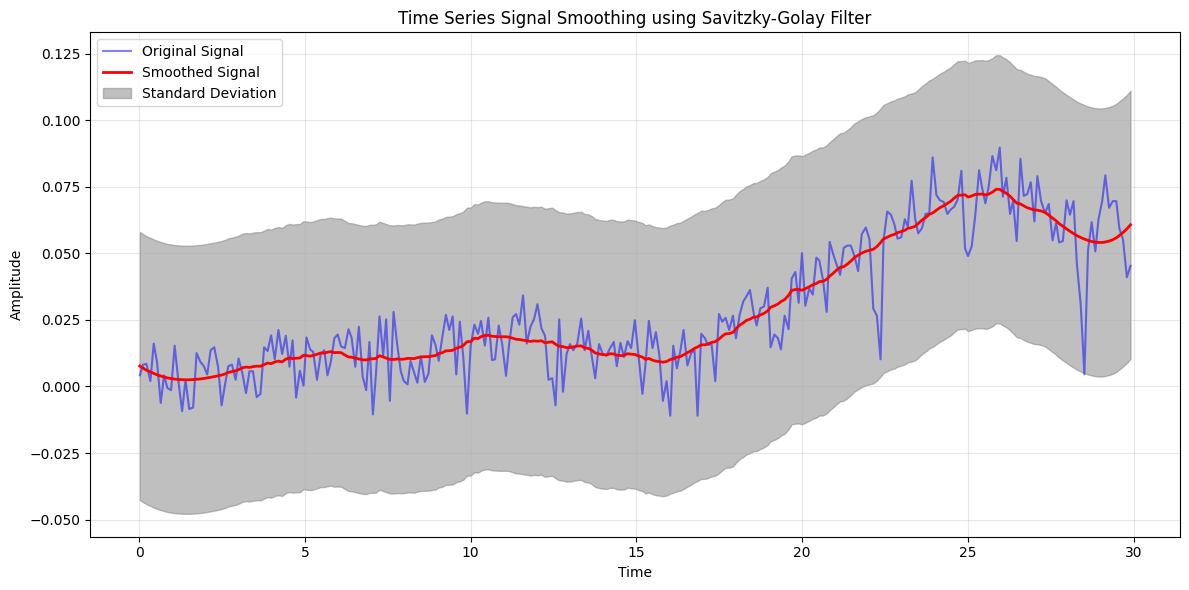

S1_T3.csv data


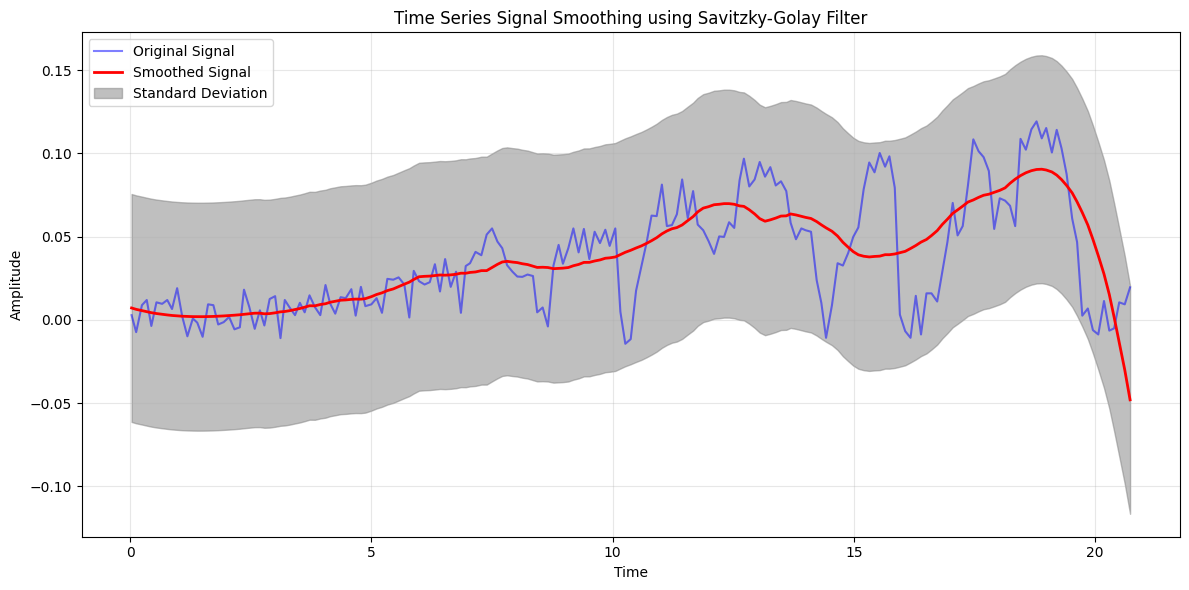

S1_T2.csv data


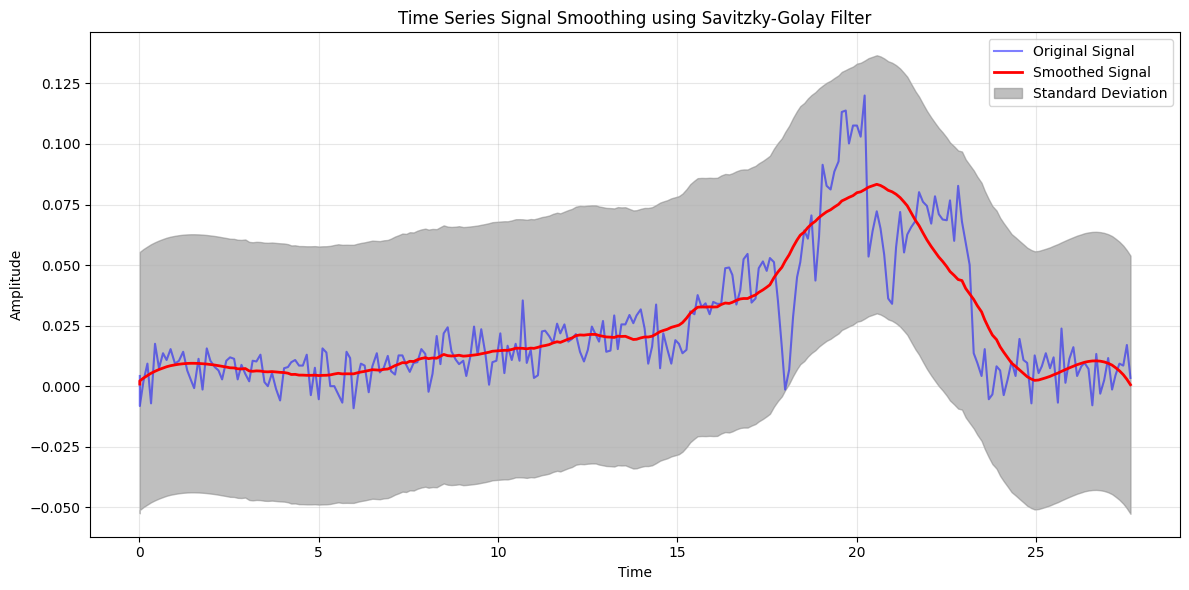

S1_T4.csv data


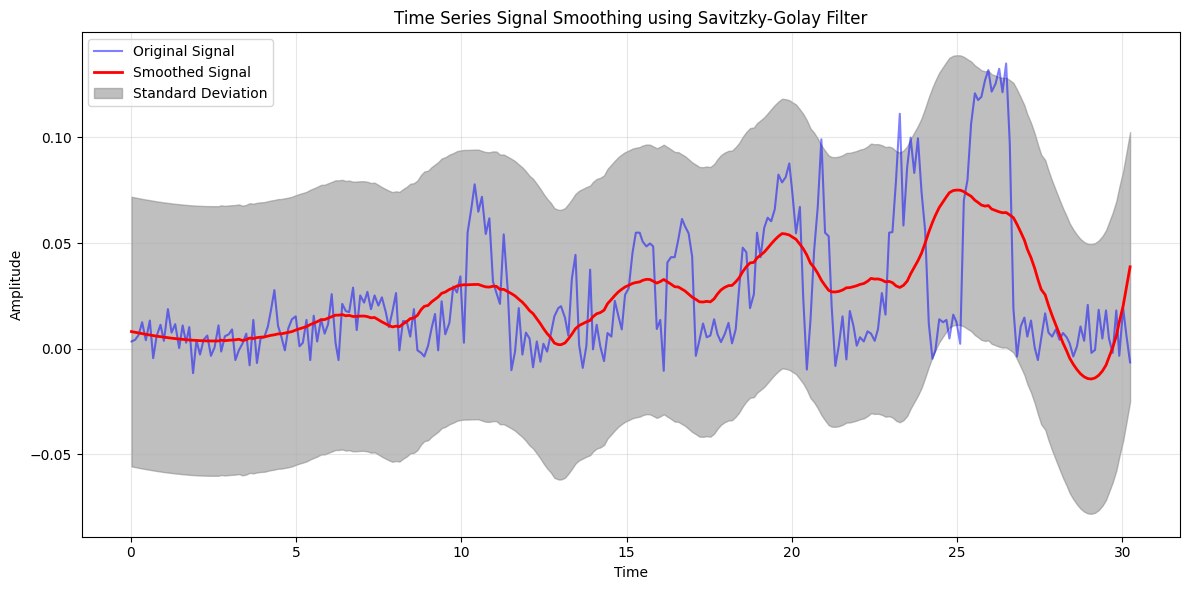

In [120]:
for dir in dir_list:
    if dir == 'README.txt':
        continue
    df = pd.read_csv(f'{path}/{dir}')
    print(f"{dir} data")
    # stats, rolling_mean, rolling_std = statistical_analysis(df)
    # frequencies, amplitudes = spectral_analysis(df)
    # df_with_derivative = compute_time_derivative(df)
    
    # # Print results
    # print("Statistical Analysis Results:")
    # for key, value in stats.items():
    #     print(f"{key}: {value}")
    # df = compute_time_derivative(df)
    # plot_signals(df)

    # Smooth the signal using Savitzky-Golay filter
    window_size = 50
    degree = 3
    smoothed_signal = savgol_filter(df['Force'], window_size, degree)
    std_dev = np.std(df['Force'])
    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(df['Time'], df['Force'], 'b-', alpha=0.5, label='Original Signal')
    plt.plot(df['Time'], smoothed_signal, 'r-', linewidth=2, label='Smoothed Signal')
    
    plt.fill_between(df['Time'], 
                    smoothed_signal - 2*std_dev, 
                    smoothed_signal + 2*std_dev, 
                    color='gray', 
                    alpha=0.5, 
                    label='Standard Deviation')
    
    # Customize the plot
    plt.title('Time Series Signal Smoothing using Savitzky-Golay Filter')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()

Outliers detected using Z-score method:
          Time   Force
195  20.854434  0.1104
196  20.965079  0.1299
204  21.810851  0.1667
237  25.341475  0.1214
240  25.650333  0.1053


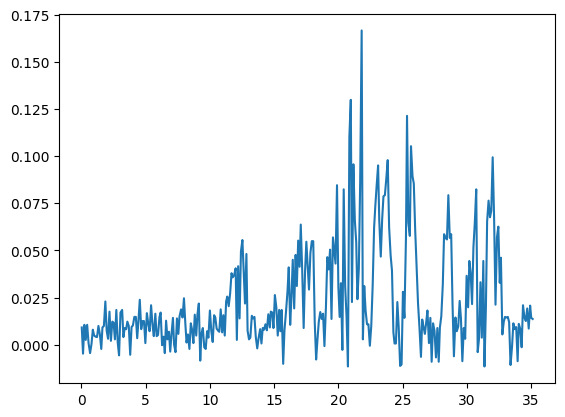

In [121]:
import pandas as pd
import numpy as np

df = pd.read_csv ('./Data/S2_T2.csv')

def detect_outliers_zscore(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    z_scores = np.abs((df[column] - mean) / std)
    return df[z_scores > threshold]

# Apply the function
outliers = detect_outliers_zscore(df, 'Force', threshold=3)
print("Outliers detected using Z-score method:")
print(outliers)

plt.plot(df['Time'], df['Force'])

In [122]:
def detect_outliers_iqr(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (factor * IQR)
    upper_bound = Q3 + (factor * IQR)
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Apply the function
outliers = detect_outliers_iqr(df, 'Force', factor=1.5)
print("Outliers detected using IQR method:")
print(outliers)

Outliers detected using IQR method:
          Time   Force
186  19.892079  0.0846
191  20.413352  0.0824
195  20.854434  0.1104
196  20.965079  0.1299
198  21.166226  0.0957
203  21.693433  0.0855
204  21.810851  0.1667
215  22.982824  0.0849
216  23.090677  0.0951
222  23.727923  0.0880
223  23.838314  0.0979
237  25.341475  0.1214
240  25.650333  0.1053
241  25.768257  0.0894
242  25.868652  0.0855
287  30.728524  0.0824
299  32.008613  0.0994


In [123]:
def detect_outliers_rolling(df, column, window=20, threshold=3):
    rolling_mean = df[column].rolling(window=window).mean()
    rolling_std = df[column].rolling(window=window).std()
    z_scores = np.abs((df[column] - rolling_mean) / rolling_std)
    return df[z_scores > threshold]

# Apply the function
outliers = detect_outliers_rolling(df, 'Force', window=20, threshold=3)
print("Outliers detected using Rolling Window method:")
print(outliers)

Outliers detected using Rolling Window method:
          Time   Force
264  28.225206  0.0586


In [124]:
def detect_outliers_mad(df, column, threshold=3.5):
    median = df[column].median()
    mad = np.median(np.abs(df[column] - median))
    modified_z_scores = 0.6745 * (df[column] - median) / mad
    return df[np.abs(modified_z_scores) > threshold]

# Apply the function
outliers = detect_outliers_mad(df, 'Force', threshold=3.5)
print("Outliers detected using MAD method:")
print(outliers)

Outliers detected using MAD method:
          Time   Force
186  19.892079  0.0846
191  20.413352  0.0824
195  20.854434  0.1104
196  20.965079  0.1299
198  21.166226  0.0957
203  21.693433  0.0855
204  21.810851  0.1667
214  22.873733  0.0736
215  22.982824  0.0849
216  23.090677  0.0951
220  23.508371  0.0787
221  23.618116  0.0793
222  23.727923  0.0880
223  23.838314  0.0979
237  25.341475  0.1214
240  25.650333  0.1053
241  25.768257  0.0894
242  25.868652  0.0855
267  28.558260  0.0793
287  30.728524  0.0824
296  31.688722  0.0764
297  31.798538  0.0676
298  31.898634  0.0710
299  32.008613  0.0994
300  32.118746  0.0674


In [125]:
dfx = pd.read_csv('./Data/S2_T1.csv')
dfx.head()

,Time,Force
0,0.035481,0.0082
1,0.118066,0.0048
2,0.229815,0.0068
3,0.339043,0.0057
4,0.428543,0.0082


In [126]:
dfx['stddev1.5'] = 1.5*np.std(df['Force'])
dfx['stddev2'] = 2*np.std(df['Force'])
dfx['label'] = 0

In [127]:
dfx.head()

,Time,Force,stddev1.5,stddev2,label
0,0.035481,0.0082,0.040806,0.054407,0
1,0.118066,0.0048,0.040806,0.054407,0
2,0.229815,0.0068,0.040806,0.054407,0
3,0.339043,0.0057,0.040806,0.054407,0
4,0.428543,0.0082,0.040806,0.054407,0


In [128]:
def set_label(row):
    if row['Force'] > row['stddev2']:
        return 'red'
    elif row['stddev1.5'] < row['Force'] < row['stddev2']:
        return 'yellow'
    else:
        return 'green'

# Apply the function to the DataFrame
dfx['label'] = dfx.apply(set_label, axis=1)

In [129]:
dfx.head()

,Time,Force,stddev1.5,stddev2,label
0,0.035481,0.0082,0.040806,0.054407,green
1,0.118066,0.0048,0.040806,0.054407,green
2,0.229815,0.0068,0.040806,0.054407,green
3,0.339043,0.0057,0.040806,0.054407,green
4,0.428543,0.0082,0.040806,0.054407,green


In [130]:
dfx['label'].value_counts()

label
green     300
red        58
yellow     45
Name: count, dtype: int64

In [131]:
dfx['result_vib'] = 0

In [132]:
def set_result(row):
    if row['label'] == 'green':
        return 0
    elif row['label'] == 'yellow':
        return row['Force']
    else:
        return 1

# Apply the function to the DataFrame
# dfx['result_vib'] = dfx.apply(set_label, axis=1)

In [133]:
dfx.head()

,Time,Force,stddev1.5,stddev2,label,result_vib
0,0.035481,0.0082,0.040806,0.054407,green,0
1,0.118066,0.0048,0.040806,0.054407,green,0
2,0.229815,0.0068,0.040806,0.054407,green,0
3,0.339043,0.0057,0.040806,0.054407,green,0
4,0.428543,0.0082,0.040806,0.054407,green,0


In [134]:
dfx.head()

,Time,Force,stddev1.5,stddev2,label,result_vib
0,0.035481,0.0082,0.040806,0.054407,green,0
1,0.118066,0.0048,0.040806,0.054407,green,0
2,0.229815,0.0068,0.040806,0.054407,green,0
3,0.339043,0.0057,0.040806,0.054407,green,0
4,0.428543,0.0082,0.040806,0.054407,green,0


In [71]:
for i in range(len(dir_list)):
    if dir_list[i] == 'README.txt':
        continue
    dfx = pd.read_csv(f'{path}/{dir_list[i]}')
    dfx['stddev1.5'] = 1.5*np.std(df['Force'])
    dfx['stddev2'] = 2*np.std(df['Force'])
    dfx['label'] = 0
    dfx['label'] = dfx.apply(set_label, axis=1)
    dfx['result_vib'] = dfx.apply(set_result, axis=1)
    # dfx.drop(['stddev1.5', 'stddev2'], axis=1, inplace=True)
    dfx.to_json(f'{dir_list[i][:-4]}.json', orient='records')

In [77]:
dfx = pd.read_csv('./Data/S2_T1.csv')
dfx.head()

,Time,Force
0,0.035481,0.0082
1,0.118066,0.0048
2,0.229815,0.0068
3,0.339043,0.0057
4,0.428543,0.0082


In [78]:
dfx['stddev1.5'] = 1.5*np.std(df['Force'])
dfx['stddev2'] = 2*np.std(df['Force'])
dfx['label'] = 0

In [79]:
def set_label(row):
    if row['Force'] > row['stddev2']:
        return 'red'
    elif row['stddev1.5'] < row['Force'] < row['stddev2']:
        return 'yellow'
    else:
        return 'green'

# Apply the function to the DataFrame
dfx['label'] = dfx.apply(set_label, axis=1)

In [80]:
def set_result(row):
    if row['label'] == 'green':
        return 0
    elif row['label'] == 'yellow':
        return row['Force']
    else:
        return 999

In [81]:
dfx['result_vib'] = dfx.apply(set_result, axis=1)

In [82]:
m = MinMaxScaler()

In [83]:
dfx[dfx['label'] == 'yellow']['result_vib'].values

array([0.0518, 0.0459, 0.0433, 0.0419, 0.0543, 0.045 , 0.0439, 0.0493,
       0.0436, 0.0453, 0.045 , 0.0461, 0.0512, 0.0538, 0.0456, 0.0442,
       0.0473, 0.0433, 0.0464, 0.0524, 0.0541, 0.0442, 0.0509, 0.0532,
       0.0444, 0.0538, 0.0439, 0.0501, 0.0512, 0.0498, 0.041 , 0.0461,
       0.0425, 0.0433, 0.0419, 0.0464, 0.0419, 0.0512, 0.0509, 0.0473,
       0.049 , 0.0515, 0.0524, 0.0532, 0.0515])

In [84]:
filtered_df = dfx[dfx['label'] == 'yellow']

In [85]:
filtered_df.shape

(45, 6)

In [86]:
sc = m.fit_transform(filtered_df[['result_vib']])

In [65]:
sc

array([[0.81203008],
       [0.36842105],
       [0.17293233],
       [0.06766917],
       [1.        ],
       [0.30075188],
       [0.21804511],
       [0.62406015],
       [0.19548872],
       [0.32330827],
       [0.30075188],
       [0.38345865],
       [0.76691729],
       [0.96240602],
       [0.34586466],
       [0.2406015 ],
       [0.47368421],
       [0.17293233],
       [0.40601504],
       [0.85714286],
       [0.98496241],
       [0.2406015 ],
       [0.7443609 ],
       [0.91729323],
       [0.2556391 ],
       [0.96240602],
       [0.21804511],
       [0.68421053],
       [0.76691729],
       [0.66165414],
       [0.        ],
       [0.38345865],
       [0.11278195],
       [0.17293233],
       [0.06766917],
       [0.40601504],
       [0.06766917],
       [0.76691729],
       [0.7443609 ],
       [0.47368421],
       [0.60150376],
       [0.78947368],
       [0.85714286],
       [0.91729323],
       [0.78947368]])

In [87]:
dfx.loc[dfx['label'] == 'yellow', 'result_vib'] = sc

In [88]:
dfx['label'].value_counts()

label
green     300
red        58
yellow     45
Name: count, dtype: int64

In [91]:
def change_yellow_labels(df):
    # Define the bins and labels
    bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
    yellow_labels = ['yellow1', 'yellow2', 'yellow3', 'yellow4', 'yellow5']
    
    # Create a mask for rows where label is 'yellow'
    yellow_mask = df['label'] == 'yellow'
    
    # Use pd.cut to categorize the result_vib values
    df.loc[yellow_mask, 'label'] = pd.cut(df.loc[yellow_mask, 'result_vib'], 
                                           bins=bins, 
                                           labels=yellow_labels, 
                                           include_lowest=True)
    
    return df

In [92]:
dfx = change_yellow_labels(dfx)

In [95]:
dfx['label'].value_counts()

label
green      300
red         58
yellow2     12
yellow4     11
yellow1      9
yellow5      8
yellow3      4
Name: count, dtype: int64

In [135]:
for i in range(len(dir_list)):
    if dir_list[i] == 'README.txt':
        continue
    dfx = pd.read_csv(f'{path}/{dir_list[i]}')
    dfx['stddev1.5'] = np.std(df['Force'])
    dfx['stddev2'] = 2*np.std(df['Force'])
    dfx['label'] = 0
    dfx['label'] = dfx.apply(set_label, axis=1)
    dfx['result_vib'] = dfx.apply(set_result, axis=1)
    dfx.drop(['stddev1.5', 'stddev2'], axis=1, inplace=True)
    m = MinMaxScaler()
    filtered_df = dfx[dfx['label'] == 'yellow']
    sc = m.fit_transform(filtered_df[['result_vib']])
    dfx.loc[dfx['label'] == 'yellow', 'result_vib'] = sc
    dfx = change_yellow_labels(dfx)
    # print(dfx['result_vib'].value_counts())
    dfx.to_json(f'{dir_list[i][:-4]}.json', orient='records')